In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn 

# Short Term Predictions Visualization(March - May all 3 years)

0
1
2


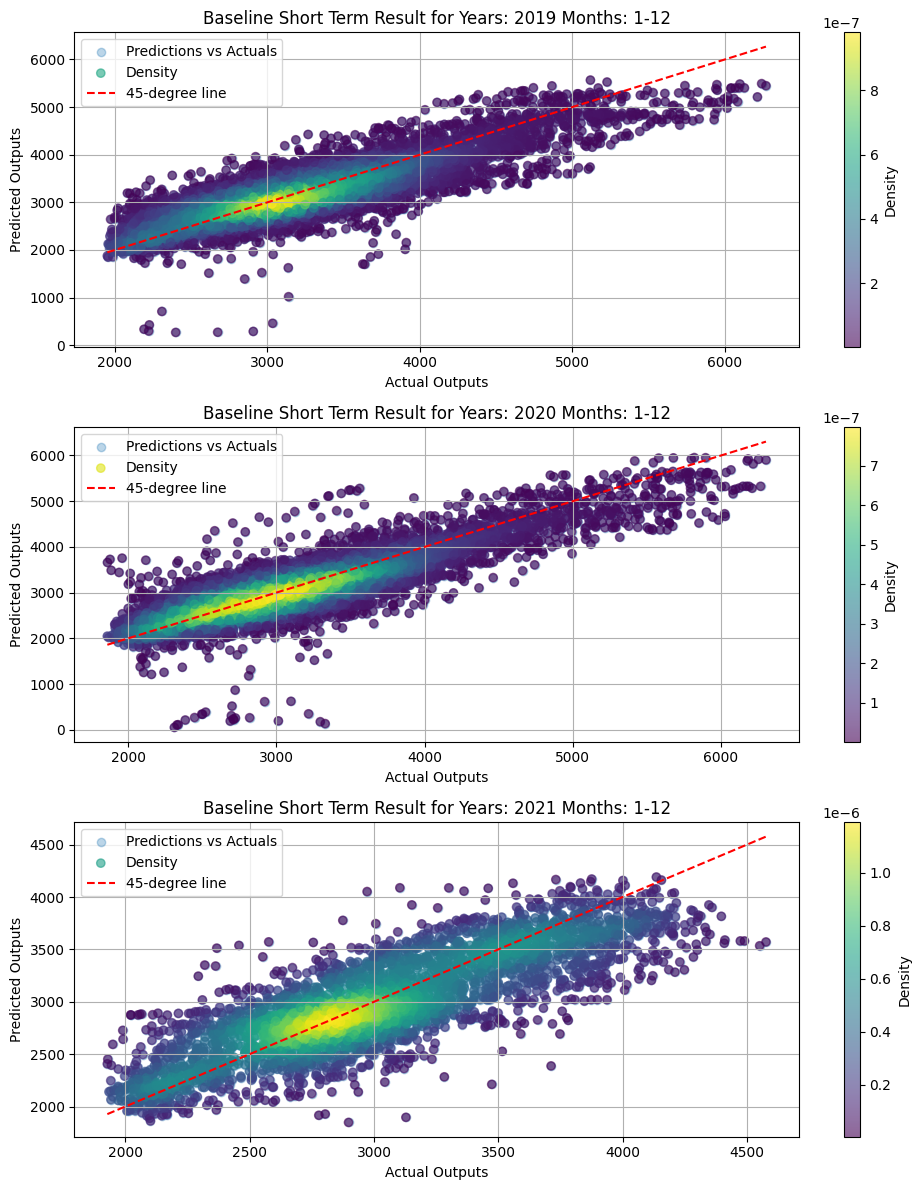

In [8]:
from scipy.stats import gaussian_kde
# Load the data into DataFrames
actuals_short = pd.read_csv("TestingShort/TestingActual_Short.csv")
predictions_short = pd.read_csv("/home/jik19004/FilesToRun/BayesianTimeSeries/Bayesian_1sample/TestingShort/TestingPredictionsShort.csv")
# Extract dates from the column headers
actuals_short.columns = pd.to_datetime(
    actuals_short.columns.str.extract(r'(\d{1,2}/\d{1,2}/\d{4})')[0], format='%m/%d/%Y', errors='coerce'
)
predictions_short.columns = pd.to_datetime(
    predictions_short.columns.str.extract(r'(\d{1,2}/\d{1,2}/\d{4})')[0], format='%m/%d/%Y', errors='coerce'
)
# Filter columns for dates between March and May over three years
valid_months = [i for i in range(1,13,1)]
valid_years = [2019, 2020, 2021]
filtered_columns = [
    col for col in actuals_short.columns if col.month in valid_months and col.year in valid_years
]
# Subset the data
filtered_actuals_short = actuals_short[filtered_columns]
filtered_predictions_short = predictions_short[filtered_columns]
# Function to create combined scatter and density plots for each month
def plot_monthly_comparison_with_density(actuals, predictions, months, years, figwidth = 10, figheight = 12, text = "Baseline Long Term Result for Years:"):
    fig, axes = plt.subplots(nrows=len(years), ncols=1, figsize=(figwidth, figheight))
    
    idx = 0 
    for year in years:
        print(idx)
        all_actuals = []
        all_predictions = []
    
        for month in months:
            # Filter columns for the specific month and year
            filtered_cols = [col for col in actuals.columns if col.month == month and col.year == year]
            monthly_actuals = actuals[filtered_cols].values.flatten()
            monthly_predictions = predictions[filtered_cols].values.flatten()
                
            # Remove NaN values
            mask = ~np.isnan(monthly_actuals) & ~np.isnan(monthly_predictions)
            monthly_actuals = monthly_actuals[mask]
            monthly_predictions = monthly_predictions[mask]
                
            # Accumulate data for the overall scatter plot
            all_actuals.extend(monthly_actuals)
            all_predictions.extend(monthly_predictions)
        
        all_actuals = np.array(all_actuals)
        all_predictions = np.array(all_predictions)
        
        # Create scatter plot
        scatter = axes[idx].scatter(all_actuals, all_predictions, alpha=0.3, label="Predictions vs Actuals")
        
        # Add density-based scatter plot if applicable
        if len(all_actuals) > 1 and len(all_predictions) > 1:
            xy = np.vstack([all_actuals, all_predictions])
            density = gaussian_kde(xy)(xy)
            scatter = axes[idx].scatter(all_actuals, all_predictions, c=density, cmap='viridis', alpha=0.6, label="Density")
            
            # Add a color bar for the density plot
            cbar = fig.colorbar(scatter, ax=axes[idx])
            cbar.set_label("Density")
        
        # Add a 45-degree line
        if len(all_actuals) > 0 and len(all_predictions) > 0:
            axes[idx].plot([all_actuals.min(), all_actuals.max()],
                           [all_actuals.min(), all_actuals.max()],
                           color='red', linestyle='--', label="45-degree line")
        
        # Labels and title
        axes[idx].set_xlabel("Actual Outputs")
        axes[idx].set_ylabel("Predicted Outputs")
        axes[idx].set_title("{} {} Months: {}-{}".format(text, year, months[0], months[-1]))
        axes[idx].legend()
        axes[idx].grid(True)
        
        idx += 1
    
    plt.tight_layout()
    plt.show()
# Generate combined plots for March, April, and May
plot_monthly_comparison_with_density(filtered_actuals_short, filtered_predictions_short, valid_months, [2019,2020,2021], text = "Baseline Short Term Result for Years:" )

# Long Term Predictions Visualization(March - May all 3 years)

0


1


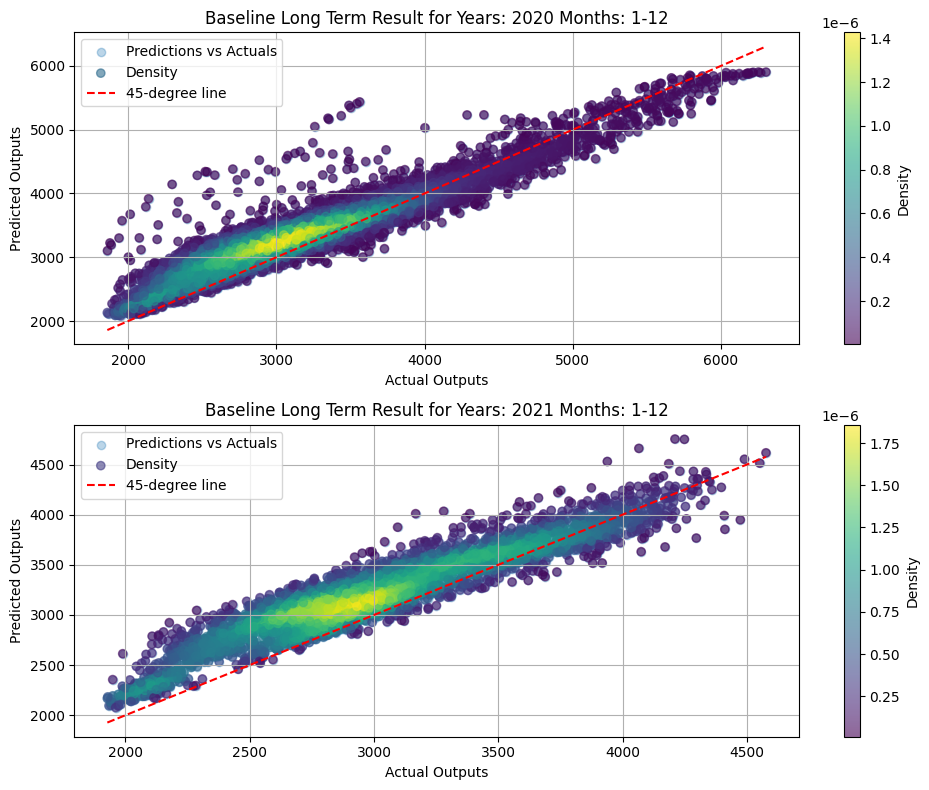

In [9]:
actuals_long = pd.read_csv("TestingLong/TestingActual_Long.csv")
predictions_long = pd.read_csv("/home/jik19004/FilesToRun/BayesianTimeSeries/Bayesian_1sample/TestingLong/TestingPredictionsLong.csv")
# Extract dates from the column headers
actuals_long.columns = pd.to_datetime(
    actuals_long.columns.str.extract(r'(\d{1,2}/\d{1,2}/\d{4})')[0], format='%m/%d/%Y', errors='coerce'
)
predictions_long.columns = pd.to_datetime(
    predictions_long.columns.str.extract(r'(\d{1,2}/\d{1,2}/\d{4})')[0], format='%m/%d/%Y', errors='coerce'
)

valid_months = [i for i in range(1,13,1)]
valid_years = [2020, 2021]
filtered_columns = [
    col for col in actuals_long.columns if col.month in valid_months and col.year in valid_years
]

filtered_actuals_long = actuals_long[filtered_columns]
filtered_predictions_long = predictions_long[filtered_columns]

filtered_columns = [
    col for col in actuals_long.columns if col.month in valid_months and col.year in valid_years
]

# Subset the data
filtered_actuals_long = actuals_long[filtered_columns]
filtered_predictions_long = predictions_long[filtered_columns]


plot_monthly_comparison_with_density(filtered_actuals_long, filtered_predictions_long, valid_months, [2020,2021], figheight = 8, figwidth = 10, 
                                     text = "Baseline Long Term Result for Years:")


# Calculate the R^{2} coefficient for short and long term: 

,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29,2021-05-30
0,3871.7120,3724.3284,3612.1320,3370.3127,3650.6470,3886.5667,3877.4937,3990.3945,4230.7760,3624.6902,...,3331.2434,3907.0027,4508.7437,3294.9546,3329.8950,3853.6814,4199.8970,3220.0923,3166.5637,3143.8972
1,3801.9683,3714.8052,3566.5405,3311.5837,3591.5542,3844.6199,3824.9680,3942.6670,4141.4110,3561.4077,...,3280.5808,3884.6003,4282.5977,3219.8840,3265.4097,3767.3210,4139.5500,3178.2874,3119.3154,3092.8250
2,3702.2810,3658.9160,3495.6025,3240.0500,3521.7725,3781.9385,3775.5825,3858.6690,4012.3882,3485.0876,...,3224.6938,3772.1210,4142.2840,3137.2920,3178.8445,3678.7170,3970.2210,3149.2056,3072.0930,3032.7046
3,3569.3936,3536.8900,3375.0007,3157.9246,3436.7676,3702.6646,3655.5938,3742.9690,3853.5925,3405.7810,...,3146.1200,3752.9143,3942.4724,3060.6210,3073.5032,3572.5244,3737.9956,3096.9714,2997.6738,2959.9140
4,3419.2288,3353.4197,3234.4707,3047.2002,3320.2350,3550.2937,3500.6800,3590.2253,3678.1716,3305.7944,...,3026.5845,3674.0854,3612.1875,2954.2670,2963.4104,3448.6084,3503.1047,2981.4363,2881.2520,2837.2634
5,3231.5889,3159.6318,3062.4885,2878.5037,3123.4587,3341.2060,3305.9387,3388.9133,3460.0315,3162.2010,...,2858.1895,3505.0610,3291.8333,2789.0334,2813.2354,3263.1350,3221.1130,2808.0650,2678.1472,2633.9055
6,2990.2150,2883.7598,2825.7880,2688.8457,2920.8494,3070.5164,3056.2725,3136.7163,3199.8572,2949.4280,...,2657.2192,3337.9780,2938.4094,2554.6128,2620.3560,3010.0935,2921.9739,2551.0798,2464.2556,2435.2532
7,2773.4712,2605.7466,2559.5112,2527.9248,2764.1785,2796.7742,2797.8945,2876.3425,2972.2173,2621.1724,...,2299.1052,2957.9230,2607.1150,2267.6630,2338.7356,2651.6484,2532.3916,2268.5603,2293.4504,2289.6070
8,2742.4430,2542.6624,2496.5447,2492.1218,2714.9390,2705.8660,2739.9583,2833.6940,2901.6243,2511.1660,...,2214.8020,2796.2002,2476.9897,2203.7048,2293.3826,2555.8777,2426.9685,2213.9058,2240.6810,2249.9082
9,2752.9934,2531.1638,2466.3599,2486.7114,2722.7160,2720.9304,2725.3062,2849.9363,2875.3704,2463.9026,...,2167.4128,2677.2854,2386.6038,2191.2573,2290.9756,2536.1548,2379.0515,2200.3726,2221.5925,2247.4153


In [10]:
from sklearn.metrics import r2_score

# Function to calculate R^2 for each month across the specified years
def calculate_r2(actuals, predictions, months, year):
    all_actuals = []
    all_predictions = []
    
    for month in months:
        # Filter data for the specific month and year
        filtered_cols = [col for col in actuals.columns if col.month == month and col.year == year]
        monthly_actuals = actuals[filtered_cols].values.flatten()
        monthly_predictions = predictions[filtered_cols].values.flatten()
        # Remove NaN values
        mask = ~np.isnan(monthly_actuals) & ~np.isnan(monthly_predictions)
        monthly_actuals = monthly_actuals[mask]
        monthly_predictions = monthly_predictions[mask]
        
        # Accumulate data for the overall calculation
        all_actuals.extend(monthly_actuals)
        all_predictions.extend(monthly_predictions)
        print(len(monthly_actuals))
        print(monthly_predictions)
    all_actuals = np.array(all_actuals)
    all_predictions = np.array(all_predictions)
    return r2_score(all_actuals, all_predictions)
r2_scores = {}

short_years = [2019,2020,2021] 
months = [3,4,5]

for year in short_years: 
    r2_scores[year] = calculate_r2(filtered_actuals_short, filtered_predictions_short, months, year) # calculate the r2 score for each year. 
# Display the R^2 scores for each month
print("Short Term R^2 coefficient:")
r2_scores

744
[3684.008  3438.9802 3393.2888 3464.06   3789.969  3597.28   4047.0747
 3877.2268 3708.8245 3282.3892 3010.3774 3163.9497 3296.0015 3381.586
 3287.4575 3040.9927 3216.9458 3052.0693 3262.3403 3286.8567 3137.3284
 3262.221  3331.805  3070.4744 3176.2961 3299.6372 3045.0842 3349.4373
 3525.584  3152.7656 2966.7842 3572.647  3353.241  3339.0854 3255.8252
 3750.5603 3597.3652 4066.5889 3880.0999 3600.2644 3245.8755 3014.559
 3168.5142 3296.29   3365.657  3261.4636 3018.0383 3235.6084 3072.5903
 3212.4229 3225.5598 3138.7786 3262.1287 3331.8157 3023.534  3171.714
 3169.3286 2998.1816 3323.3748 3525.1545 3050.8843 2824.2231 3421.0378
 3234.7239 3297.7485 3196.3696 3744.6938 3597.4038 4125.255  3883.2407
 3626.2126 3174.8418 3049.6018 3200.3882 3296.4292 3310.129  3254.5132
 3007.2776 3218.6208 3082.4001 3196.6807 3179.5242 3141.4814 3206.0403
 3331.8188 3014.6672 3154.2776 3065.5032 2973.583  3259.716  3520.5598
 2970.437  2659.1096 3388.5876 3144.2102 3224.402  3137.9666 3745.3042
 3597

{2019: 0.5104278195081023, 2020: 0.45735252083425315, 2021: 0.5192926246143506}

In [11]:
r2_scores = {}
long_years = [2020,2021]
for year in long_years:
    r2_scores[year] = calculate_r2(filtered_actuals_long, filtered_predictions_long, months, year)
# Display the R^2 scores for each month
print("Long Term R^2 coefficient:")
r2_scores

744
[3716.1172 3591.7512 3435.1487 3333.8572 3550.4045 3733.587  3423.91
 3082.081  3084.1514 3126.8015 3323.217  3562.3713 3178.9307 3148.8796
 3147.832  3789.0127 3545.883  3418.3552 3526.0486 3084.5107 3020.7666
 3485.9226 3921.7444 3462.895  3698.918  3314.5952 3185.1577 3256.4805
 3261.8567 3607.929  3525.8496 3700.643  3536.3865 3436.7332 3355.7256
 3591.9329 3693.8696 3447.8909 3125.063  3066.536  3127.2505 3341.6604
 3529.9636 3178.672  3168.09   3194.6345 3771.654  3481.688  3444.5334
 3509.7222 3059.5    3070.6296 3485.484  3815.4448 3495.6074 3662.4502
 3313.7659 3138.7212 3256.801  3199.6182 3578.4685 3512.3413 3683.7712
 3472.5288 3376.8784 3368.1707 3585.0613 3638.825  3446.0935 3164.4858
 3072.6426 3134.7244 3312.278  3480.6157 3178.1716 3172.893  3254.9453
 3719.0933 3452.3323 3445.1448 3478.5044 3035.2761 3120.8074 3472.695
 3709.592  3523.9375 3588.819  3344.8713 3112.221  3231.6968 3134.3606
 3517.5894 3487.4636 3638.5935 3375.827  3246.4038 3335.7263 3523.2913
 3543

{2020: 0.0384645523868854, 2021: 0.47788008242383373}